In [1]:
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
trainset = pd.read_csv('train.csv')
X = trainset.drop(trainset.columns[[0,1]],axis=1)
y = pd.DataFrame(trainset['y'])

In [3]:
#feature transformation
#quadratic x6-x10
X_squared = X**2
X_squared.columns=['x6', 'x7','x8', 'x9', 'x10']
X_trafo = pd.concat([X, X_squared],axis=1)

#exponential x11-x15
X_exp = np.exp(X)
X_exp.columns=['x11', 'x12','x13', 'x14', 'x15']
X_trafo = pd.concat([X_trafo, X_exp],axis=1)

#cosine x16-x20
X_cos = np.cos(X)
X_cos.columns=['x16', 'x17','x18', 'x19', 'x20']
X_trafo = pd.concat([X_trafo, X_cos],axis=1)

#constant x21
X_trafo['x21'] = np.ones_like(700)

X_train, X_test, y_train, y_test = train_test_split(
    X_trafo, y, test_size=0.2, random_state=0)

display(X_trafo)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21
0,0.02,0.05,-0.09,-0.43,-0.08,0.0004,0.0025,0.0081,0.1849,0.0064,...,1.051271,0.913931,0.650509,0.923116,0.999800,0.998750,0.995953,0.908966,0.996802,1
1,-0.13,0.11,-0.08,-0.29,-0.03,0.0169,0.0121,0.0064,0.0841,0.0009,...,1.116278,0.923116,0.748264,0.970446,0.991562,0.993956,0.996802,0.958244,0.999550,1
2,0.08,0.06,-0.07,-0.41,-0.03,0.0064,0.0036,0.0049,0.1681,0.0009,...,1.061837,0.932394,0.663650,0.970446,0.996802,0.998201,0.997551,0.917121,0.999550,1
3,0.02,-0.12,0.01,-0.43,-0.02,0.0004,0.0144,0.0001,0.1849,0.0004,...,0.886920,1.010050,0.650509,0.980199,0.999800,0.992809,0.999950,0.908966,0.999800,1
4,-0.14,-0.12,-0.08,-0.02,-0.08,0.0196,0.0144,0.0064,0.0004,0.0064,...,0.886920,0.923116,0.980199,0.923116,0.990216,0.992809,0.996802,0.999800,0.996802,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.31,-0.09,0.04,-0.09,0.03,0.0961,0.0081,0.0016,0.0081,0.0009,...,0.913931,1.040811,0.913931,1.030455,0.952334,0.995953,0.999200,0.995953,0.999550,1
696,-0.26,-0.01,0.02,-0.40,0.05,0.0676,0.0001,0.0004,0.1600,0.0025,...,0.990050,1.020201,0.670320,1.051271,0.966390,0.999950,0.999800,0.921061,0.998750,1
697,-0.27,-0.22,-0.01,-0.32,-0.05,0.0729,0.0484,0.0001,0.1024,0.0025,...,0.802519,0.990050,0.726149,0.951229,0.963771,0.975897,0.999950,0.949235,0.998750,1
698,0.19,0.11,-0.05,-0.27,-0.04,0.0361,0.0121,0.0025,0.0729,0.0016,...,1.116278,0.951229,0.763379,0.960789,0.982004,0.993956,0.998750,0.963771,0.999200,1


# LassoCV

Problem here is that, according to the warning, the model doesn't converge

In [4]:
reg = LassoCV(cv=10, random_state=0, max_iter=100000).fit(X_train, np.ravel(y_train))

y_pred = reg.predict(X_test)

C:\Users\Manue\anaconda3\envs\MLenvironment\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.20462391772866795, tolerance: 0.19612122323263595
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Manue\anaconda3\envs\MLenvironment\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3795645184707155, tolerance: 0.19612122323263595
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Manue\anaconda3\envs\MLenvironment\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.288440127674221, tolerance: 0.20193575835983052
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Manue\anaconda3\env

In [5]:
display(mean_squared_error(y_test,y_pred)**0.5)

1.8770169949619957

In [6]:
reg.coef_

array([-0.       , -1.1358922, -1.2648585, -0.       , -0.       ,
       -0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
       -0.       , -0.       , -0.       , -0.       , -0.       ,
        0.       , -0.       , -0.       , -0.       , -0.       ,
        0.       ])

# Linear Regression and manual coef choice

Feature: 0, Score: 119.478776
Feature: 1, Score: -57.189302
Feature: 2, Score: 146.408974
Feature: 3, Score: 161.753780
Feature: 4, Score: -264.025231
Feature: 5, Score: 181.138807
Feature: 6, Score: -386.600239
Feature: 7, Score: -3319.088478
Feature: 8, Score: -537.730898
Feature: 9, Score: 815.290956
Feature: 10, Score: -118.365723
Feature: 11, Score: 55.355067
Feature: 12, Score: -147.347633
Feature: 13, Score: -158.918740
Feature: 14, Score: 264.409721
Feature: 15, Score: 253.837905
Feature: 16, Score: -731.325953
Feature: 17, Score: -6822.235697
Feature: 18, Score: -1245.222403
Feature: 19, Score: 1885.395174
Feature: 20, Score: 0.000000


<BarContainer object of 21 artists>

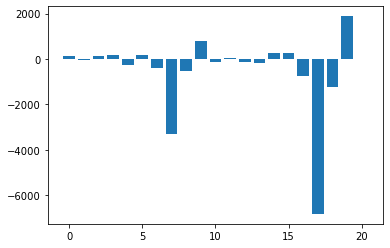

In [9]:
linreg = LinearRegression().fit(X_train, np.ravel(y_train))
importance = linreg.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)

In [10]:
def predict_manual(X):
    y = pd.DataFrame()
    parameters = [0,0,0,0,0,-386.600239,-3319.088478,-537.730898,815.290956,0,0,0,0,0,0,-731.325953,-6822.235697,-1245.222403, 1885.395174,0]
    intercept = 6757.97012211905
    y['y'] = intercept + X['x1'] * parameters[0] + X['x2'] * parameters[1] + X['x3'] * parameters[2] + X['x4'] * parameters[3] + X['x5'] * parameters[4] + X['x6'] * parameters[5] + X['x7'] * parameters[6] + X['x8'] * parameters[7] + X['x9'] * parameters[8] + X['x10'] * parameters[9] + X['x11'] * parameters[10] + X['x12'] * parameters[11] + X['x13'] * parameters[12] + X['x14'] * parameters[13] + X['x15'] * parameters[14] + X['x16'] * parameters[15] + X['x17'] * parameters[16] + X['x18'] * parameters[17] + X['x19'] * parameters[18] + X['x20'] * parameters[19]
    #y['Id'] = X['Id']
    return y

In [11]:
y_pred_manual  = predict_manual(X_test)
y_pred = linreg.predict(X_test)

In [12]:
display(mean_squared_error(y_test,y_pred)**0.5)

1.8913139862310215

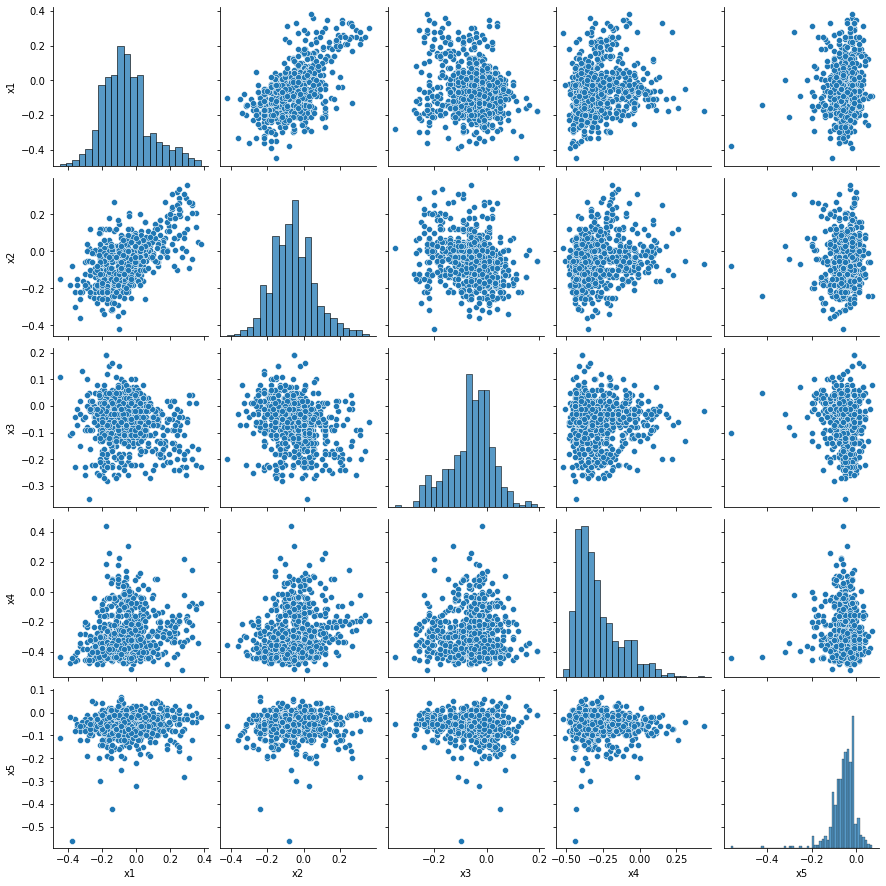

In [15]:
sns.pairplot(X, kind='scatter')

# XGBoost

Feature: 0, Score: 0.065505
Feature: 1, Score: 0.084330
Feature: 2, Score: 0.090857
Feature: 3, Score: 0.083899
Feature: 4, Score: 0.084788
Feature: 5, Score: 0.105299
Feature: 6, Score: 0.088361
Feature: 7, Score: 0.107560
Feature: 8, Score: 0.136868
Feature: 9, Score: 0.152532
Feature: 10, Score: 0.000000
Feature: 11, Score: 0.000000
Feature: 12, Score: 0.000000
Feature: 13, Score: 0.000000
Feature: 14, Score: 0.000000
Feature: 15, Score: 0.000000
Feature: 16, Score: 0.000000
Feature: 17, Score: 0.000000
Feature: 18, Score: 0.000000
Feature: 19, Score: 0.000000
Feature: 20, Score: 0.000000


<BarContainer object of 21 artists>

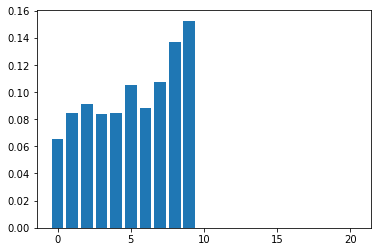

In [43]:
from xgboost import XGBRegressor
from matplotlib import pyplot

xgb = XGBRegressor()
xgb.fit(X_train, np.ravel(y_train))
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)

In [44]:
y_pred_xgb = xgb.predict(X_test)
display(mean_squared_error(y_test,y_pred_xgb)**0.5)

2.296221283891243

# Decision Tree Regressor

Feature: 0, Score: 0.065505
Feature: 1, Score: 0.084330
Feature: 2, Score: 0.090857
Feature: 3, Score: 0.083899
Feature: 4, Score: 0.084788
Feature: 5, Score: 0.105299
Feature: 6, Score: 0.088361
Feature: 7, Score: 0.107560
Feature: 8, Score: 0.136868
Feature: 9, Score: 0.152532
Feature: 10, Score: 0.000000
Feature: 11, Score: 0.000000
Feature: 12, Score: 0.000000
Feature: 13, Score: 0.000000
Feature: 14, Score: 0.000000
Feature: 15, Score: 0.000000
Feature: 16, Score: 0.000000
Feature: 17, Score: 0.000000
Feature: 18, Score: 0.000000
Feature: 19, Score: 0.000000
Feature: 20, Score: 0.000000


<BarContainer object of 21 artists>

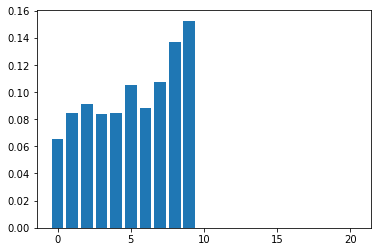

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, np.ravel(y_train))
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)

In [46]:
display(mean_squared_error(y_test,tree.predict(X_test))**0.5)

2.877376552619261